In [ ]:
!pip install networkx 
!pip install retworkx
!pip install Qiskit
!pip install qiskit_nature
!pip install qiskit_ignis
!pip install qiskit-ibm-runtime
!pip install mthree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached websocket_client-1.5.1-py3-none-any.whl (55 kB)
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.3.3
    Uninstalling websocket-client-1.3.3:
      Successfully uninstalled websocket-client-1.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followin

In [ ]:
import numpy as np

from time import time

import matplotlib.pyplot as plt

import networkx as nx

from qiskit.primitives import Estimator

from qiskit import IBMQ
#from qiskit.providers.aer import QasmSimulator, Aer

from qiskit import Aer, assemble, QuantumCircuit, QuantumRegister, ClassicalRegister, IBMQ, transpile, execute

from qiskit.circuit import Gate, Instruction, Parameter,ParameterVector

from qiskit.opflow import X, Z, I,Y

from qiskit.result import marginal_counts

import mthree
import util
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator,
                                Sampler as RuntimeSampler)
from qiskit.primitives import Sampler

import itselfmiti1

from qiskit.providers.aer import QasmSimulator, Aer

from qiskit.utils.mitigation.fitters import CompleteMeasFitter,TensoredFilter,TensoredMeasFitter

from qiskit.ignis.mitigation.measurement import complete_meas_cal, tensored_meas_cal

import copy

In [ ]:
#IBMQ.disable_account()
provider = IBMQ.enable_account('c0df7c866f628346a4ad9eb0955b0b9e8ffedc7dc25fa33a87a59e50864c059fa00f211c7f611efee085a4b810646179209cc819b26a4903c733466bb8b96f51')
IBMQ.update_account()
print(IBMQ.providers())


provider = IBMQ.get_provider(hub='ibm-q-community',
                            group='ibmquantumawards', 
                            project='open-science-22')
backend_sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_guadalupe'))
backend_real_jakarta = provider.get_backend('ibmq_guadalupe')
backend_sim_ideal = Aer.get_backend('aer_simulator')
BACKEND = backend_real_jakarta


<ipython-input-3-7b10422b92ce>:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.enable_account('c0df7c866f628346a4ad9eb0955b0b9e8ffedc7dc25fa33a87a59e50864c059fa00f211c7f611efee085a4b810646179209cc819b26a4903c733466bb8b96f51')
<ipython-input-3-7b10422b92ce>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.enable_account('c0df7c866f628346

Found 0 credentials.
No credentials available for updating could be found. No action will be performed.
[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')>]


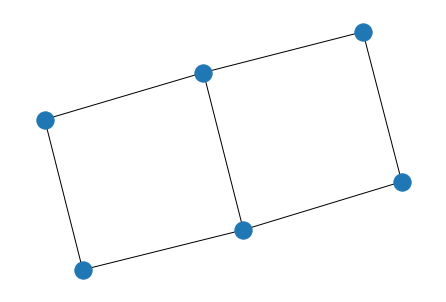

In [ ]:

g = nx.Graph()
 
g.add_edge(0, 1)
g.add_edge(1, 3)
g.add_edge(0, 2)
g.add_edge(2, 3)
g.add_edge(2, 4)
g.add_edge(3, 5)
g.add_edge(4, 5)
 
nx.draw(g)
plt.show()


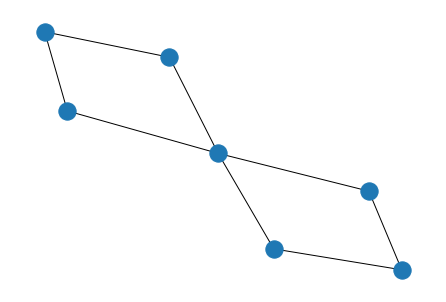

In [ ]:

g_edge_OBC = nx.Graph()
 
g_edge_OBC.add_edge(0, 1)
g_edge_OBC.add_edge(1, 2)
g_edge_OBC.add_edge(0, 3)
g_edge_OBC.add_edge(2, 3)
g_edge_OBC.add_edge(2, 4)
g_edge_OBC.add_edge(6, 5)
g_edge_OBC.add_edge(4, 5)
g_edge_OBC.add_edge(6, 2)
 
nx.draw(g_edge_OBC)
plt.show()

In [ ]:
g=1
h=1

In [ ]:
def trotter_step_OBC(dt):

  qr=QuantumRegister(7)
  circuit = QuantumCircuit(qr)

  for i in range (7):
    circuit.rx(g*dt, qr[i])
  
  circuit.cx(qr[3],qr[2])
  circuit.cx(qr[2],qr[1])
  circuit.cx(qr[1],qr[0])
  circuit.cx(qr[3],qr[4])
  circuit.cx(qr[4],qr[5])
  circuit.cx(qr[5],qr[6])

  circuit.rz(h*dt,qr[0])
  circuit.rz(h*dt,qr[6])

  circuit.cx(qr[5],qr[6])
  circuit.cx(qr[4],qr[5])
  circuit.cx(qr[3],qr[4])
  circuit.cx(qr[1],qr[0])
  circuit.cx(qr[2],qr[1])
  circuit.cx(qr[3],qr[2])

  return circuit

In [ ]:
trotter_step_OBC(0.01).draw()

┌──────────┐          ┌───┐┌──────────┐   ┌───┐                        
q0_0: ┤ Rx(0.01) ├──────────┤ X ├┤ Rz(0.01) ├───┤ X ├────────────────────────
      ├──────────┤     ┌───┐└─┬─┘└──────────┘   └─┬─┘    ┌───┐               
q0_1: ┤ Rx(0.01) ├─────┤ X ├──■───────────────────■──────┤ X ├───────────────
      ├──────────┤┌───┐└─┬─┘                             └─┬─┘          ┌───┐
q0_2: ┤ Rx(0.01) ├┤ X ├──■─────────────────────────────────■────────────┤ X ├
      ├──────────┤└─┬─┘                                                 └─┬─┘
q0_3: ┤ Rx(0.01) ├──■────■───────────────────────────────────────────■────■──
      ├──────────┤     ┌─┴─┐                                       ┌─┴─┐     
q0_4: ┤ Rx(0.01) ├─────┤ X ├──■─────────────────────────────────■──┤ X ├─────
      ├──────────┤     └───┘┌─┴─┐                             ┌─┴─┐└───┘     
q0_5: ┤ Rx(0.01) ├──────────┤ X ├─────■────────────────────■──┤ X ├──────────
      ├──────────┤          └───┘   ┌─┴─┐    ┌──────────┐┌─┴─┐└───┘          
q0_6: ┤ Rx(0.01) ├──────────────────┤ X ├────┤ Rz(0.01) ├┤ X ├───────────────
      └──────────┘                  └───┘    └──────────┘└───┘

In [ ]:
def N_circ_OBC(N,t):
  qr=QuantumRegister(7)
  circuit = QuantumCircuit(qr) 

  dt=t/N
  for _ in range (0,N):
    circuit.append(trotter_step_OBC(dt),qr)
  return circuit


In [ ]:
N_circ_OBC(10,0.01).draw()

┌───────────────┐┌───────────────┐┌───────────────┐┌───────────────┐»
q1_0: ┤0              ├┤0              ├┤0              ├┤0              ├»
      │               ││               ││               ││               │»
q1_1: ┤1              ├┤1              ├┤1              ├┤1              ├»
      │               ││               ││               ││               │»
q1_2: ┤2              ├┤2              ├┤2              ├┤2              ├»
      │               ││               ││               ││               │»
q1_3: ┤3 circuit-1333 ├┤3 circuit-1336 ├┤3 circuit-1339 ├┤3 circuit-1342 ├»
      │               ││               ││               ││               │»
q1_4: ┤4              ├┤4              ├┤4              ├┤4              ├»
      │               ││               ││               ││               │»
q1_5: ┤5              ├┤5              ├┤5              ├┤5              ├»
      │               ││               ││               ││               │»
q1_6: ┤6              ├┤6              ├┤6              ├┤6              ├»
      └───────────────┘└───────────────┘└───────────────┘└───────────────┘»
«      ┌───────────────┐┌───────────────┐┌───────────────┐┌───────────────┐»
«q1_0: ┤0              ├┤0              ├┤0              ├┤0              ├»
«      │               ││               ││               ││               │»
«q1_1: ┤1              ├┤1              ├┤1              ├┤1              ├»
«      │               ││               ││               ││               │»
«q1_2: ┤2              ├┤2              ├┤2              ├┤2              ├»
«      │               ││               ││               ││               │»
«q1_3: ┤3 circuit-1345 ├┤3 circuit-1348 ├┤3 circuit-1351 ├┤3 circuit-1354 ├»
«      │               ││               ││               ││               │»
«q1_4: ┤4              ├┤4              ├┤4              ├┤4              ├»
«      │               ││               ││               ││               │»
«q1_5: ┤5              ├┤5              ├┤5              ├┤5              ├»
«      │               ││               ││               ││               │»
«q1_6: ┤6              ├┤6              ├┤6              ├┤6              ├»
«      └───────────────┘└───────────────┘└───────────────┘└───────────────┘»
«      ┌───────────────┐┌───────────────┐
«q1_0: ┤0              ├┤0              ├
«      │               ││               │
«q1_1: ┤1              ├┤1              ├
«      │               ││               │
«q1_2: ┤2              ├┤2              ├
«      │               ││               │
«q1_3: ┤3 circuit-1357 ├┤3 circuit-1360 ├
«      │               ││               │
«q1_4: ┤4              ├┤4              ├
«      │               ││               │
«q1_5: ┤5              ├┤5              ├
«      │               ││               │
«q1_6: ┤6              ├┤6              ├
«      └───────────────┘└───────────────┘

In [ ]:
def circs_run(num_trots,num_times,time,backend,qubits=[0,1,2,3,4,5,6],qubits_measure=[0],shots=100000):
    circs=[]
    times=time*np.arange(1,num_times+1,1,dtype=float)/(num_times+1)
    print(times)
    config=backend.configuration()
    N_qubits_backend=config.n_qubits
    N_qubits_measure=len(qubits_measure)

    for i in range (0,num_trots):
      for k in range (0,num_times):
        qr=QuantumRegister(N_qubits_backend,name="q")
        cr=ClassicalRegister(len(qubits_measure))
        qc=QuantumCircuit(qr,cr)
        qr_target=[]
        for qubit in qubits:
            qr_target.append(qr[qubit])
        qc.append(N_circ_OBC(i+2,times[k]),qr_target)
        for j,qubit in enumerate(qubits_measure):
          qc.measure(qr[qubit],cr[j])
        qc=transpile(qc,backend=BACKEND,optimization_level=0)
        circs.append(qc)
        if (k==0):
          calci=copy.deepcopy(qc)
          calci.remove_final_measurements()
      calci.draw()
      cal_circs_GEM, s_labels = itselfmiti1.GEM_calibration_circuits(calci,qubits_measure=qubits_measure)
      circs.append(cal_circs_GEM[0][0])
      circs.append(cal_circs_GEM[0][1])
      circs.append(cal_circs_GEM[1][0])
      circs.append(cal_circs_GEM[1][1])
    return circs,s_labels

In [ ]:
num_trots=6
num_times=40
time=4*np.pi
shots=100000
config=BACKEND.configuration()
initial_layout=[0,1,4,7,10,12,13]
N_qubits_backend=config.n_qubits
s_labels=util.bin_list(1)
times=time*np.arange(1,num_times+1,1,dtype=float)/(num_times+1)

In [ ]:
qr = QuantumRegister(7)
mit_pattern = [[0]]
shots=100000
meas_calibs, s_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
print(len(meas_calibs))
job_cal = execute(meas_calibs, backend=backend_sim_ideal, shots=shots)
cal_results = job_cal.result()
cal_counts=cal_results.get_counts()
print(cal_counts)
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)


2
[{'0': 100000}, {'1': 100000}]


In [ ]:
circuits=[]

circ_meas,s_labels=itselfmiti1.qiskit_calibration_circuits(N_qubits_backend,qubits_measure=[initial_layout[0]])
circs,s_labels=circs_run(num_trots,num_times,time,backend=BACKEND,qubits=initial_layout,qubits_measure=[initial_layout[0]])
circuits+=circ_meas
circuits+=circs
print(len(circuits))
for circ in circuits:
  print(transpile(circ,optimization_level=0,backend=BACKEND).count_ops())

[ 0.30649684  0.61299369  0.91949053  1.22598738  1.53248422  1.83898107
  2.14547791  2.45197475  2.7584716   3.06496844  3.37146529  3.67796213
  3.98445898  4.29095582  4.59745266  4.90394951  5.21044635  5.5169432
  5.82344004  6.12993689  6.43643373  6.74293057  7.04942742  7.35592426
  7.66242111  7.96891795  8.27541479  8.58191164  8.88840848  9.19490533
  9.50140217  9.80789902 10.11439586 10.4208927  10.72738955 11.03388639
 11.34038324 11.64688008 11.95337693 12.25987377]
266
OrderedDict([('measure', 1)])
OrderedDict([('x', 1), ('measure', 1)])
OrderedDict([('rz', 46), ('sx', 28), ('cx', 24), ('measure', 1)])
OrderedDict([('rz', 46), ('sx', 28), ('cx', 24), ('measure', 1)])
OrderedDict([('rz', 46), ('sx', 28), ('cx', 24), ('measure', 1)])
OrderedDict([('rz', 46), ('sx', 28), ('cx', 24), ('measure', 1)])
OrderedDict([('rz', 46), ('sx', 28), ('cx', 24), ('measure', 1)])
OrderedDict([('rz', 46), ('sx', 28), ('cx', 24), ('measure', 1)])
OrderedDict([('rz', 46), ('sx', 28), ('cx',

In [ ]:

job=execute(circuits,BACKEND,shots=shots,optimization_level=0)

job_result=job.result()
job_counts=job_result.get_counts()
      


[ 0.30649684  0.61299369  0.91949053  1.22598738  1.53248422  1.83898107
  2.14547791  2.45197475  2.7584716   3.06496844  3.37146529  3.67796213
  3.98445898  4.29095582  4.59745266  4.90394951  5.21044635  5.5169432
  5.82344004  6.12993689  6.43643373  6.74293057  7.04942742  7.35592426
  7.66242111  7.96891795  8.27541479  8.58191164  8.88840848  9.19490533
  9.50140217  9.80789902 10.11439586 10.4208927  10.72738955 11.03388639
 11.34038324 11.64688008 11.95337693 12.25987377]
266


In [ ]:
job = provider.get_backend('ibmq_guadalupe').retrieve_job('63f34dc45b88709e3d1dfe72')

job_result=job.result()
job_counts=job_result.get_counts()

In [ ]:
print(job_counts)

[{'0': 99023, '1': 977}, {'0': 7657, '1': 92343}, {'0': 91561, '1': 8439}, {'0': 86122, '1': 13878}, {'0': 77879, '1': 22121}, {'0': 68230, '1': 31770}, {'0': 57988, '1': 42012}, {'0': 48243, '1': 51757}, {'0': 42243, '1': 57757}, {'0': 38952, '1': 61048}, {'0': 40132, '1': 59868}, {'0': 45059, '1': 54941}, {'0': 51913, '1': 48087}, {'0': 60521, '1': 39479}, {'0': 68780, '1': 31220}, {'0': 76567, '1': 23433}, {'0': 82900, '1': 17100}, {'0': 88343, '1': 11657}, {'0': 92360, '1': 7640}, {'0': 94153, '1': 5847}, {'0': 94656, '1': 5344}, {'0': 94341, '1': 5659}, {'0': 93813, '1': 6187}, {'0': 93982, '1': 6018}, {'0': 94673, '1': 5327}, {'0': 94035, '1': 5965}, {'0': 92580, '1': 7420}, {'0': 88409, '1': 11591}, {'0': 82309, '1': 17691}, {'0': 74321, '1': 25679}, {'0': 65280, '1': 34720}, {'0': 56551, '1': 43449}, {'0': 49590, '1': 50410}, {'0': 46350, '1': 53650}, {'0': 46717, '1': 53283}, {'0': 50745, '1': 49255}, {'0': 57199, '1': 42801}, {'0': 66022, '1': 33978}, {'0': 75586, '1': 24414}

In [ ]:
def bootstrap_counts(counts, k, L, return_mean=False):
    """
    Prende in input un dizionario di counts e restituisce k ricampionamenti di lunghezza L.
    Se return_mean è True, restituisce invece il dizionario di counts medio dei k ricampionamenti.
    """
    shots = sum(counts.values())
    measurements = np.random.multinomial(L, [c/shots for c in counts.values()], k)
    if return_mean:
        return dict(zip(counts.keys(), np.mean(measurements, axis=0)))
    else:
        return [dict(zip(counts.keys(), m)) for m in measurements]

In [ ]:
def bootstrap_mitigated_expectation(counts, observable, k, L, complete_meas_fitter=None):
    """
    Prende in input un dizionario di counts, un'osservabile, il numero di ricampionamenti k,
    la lunghezza dei campioni L e un oggetto CompleteMeasFitter (opzionale).
    Restituisce la media e la deviazione bootstrap dell'osservabile su k campioni di lunghezza L,
    ognuno dei quali può essere sottoposto a mitigazione degli errori mediante il fitter fornito.
    """
    if complete_meas_fitter is not None:
        bootstrapped_counts = bootstrap_counts(counts, k, L)
        expectation_values = []
        for b_counts in bootstrapped_counts:
            b_mitigated_counts = complete_meas_fitter.filter.apply(b_counts)
            b_mitigated_counts = bootstrap_counts(b_mitigated_counts, int(k/10), int(L/10) ,return_mean=True)
            b_shots_miti= sum(b_mitigated_counts.values())
            b_expectation = mthree.utils.expval(observable, b_mitigated_counts)/b_shots_miti
            expectation_values.append(b_expectation)
    else:
        bootstrapped_counts = bootstrap_counts(counts, k, L)
        expectation_values = []
        for b_counts in bootstrapped_counts:
            b_shots = sum(b_counts.values())
            b_expectation = mthree.utils.expval(b_counts,observable)
            expectation_values.append(b_expectation)
    mean = np.mean(expectation_values)
    std = np.std(expectation_values, ddof=1)
    return mean, std


In [ ]:
shots=10000
boot_counts=[]
for counts in job_counts:
  boot_counts.append(bootstrap_counts(counts,50,shots,return_mean=True))


In [ ]:
P_t=[]
G=[]
Probs_GEM=[]
Probs_GEM_P=[]
Probs_raw=[]
Probs_meas=[]
d_GEM=[]
d_AMP=[]
d_RAW=[]
d_MEAS=[]
C_GEM=[]
C_GEM_plus=[]
C_qiskit=[]

n_ric=50
n_samp=1000

s_labels=util.bin_list(1)

job_qiskit=copy.deepcopy(cal_results)
job_qiskit.results[0].data.counts=boot_counts[0]
job_qiskit.results[1].data.counts=boot_counts[1]

print(job_qiskit.get_counts())


meas_fitter = CompleteMeasFitter(job_qiskit, state_labels=s_labels)
for trot in range(0,num_trots):
    print(trot)
    job_GEM_L=copy.deepcopy(cal_results)
    job_GEM_L.results[0].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+2],method="least_squares")
    job_GEM_L.results[1].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+1+2],method="least_squares")
    job_GEM_R=copy.deepcopy(cal_results)
    job_GEM_R.results[0].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+2+2],method="least_squares")
    job_GEM_R.results[1].data.counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+num_times+3+2],method="least_squares")
    
    
    meas_fitter_GEM_L = CompleteMeasFitter(job_GEM_L, state_labels=s_labels)
    meas_fitter_GEM_R = CompleteMeasFitter(job_GEM_R, state_labels=s_labels)
    Cal_GEM_L = meas_fitter_GEM_L.cal_matrix
    Cal_GEM_R = meas_fitter_GEM_R.cal_matrix
    C=(Cal_GEM_L+Cal_GEM_R)/2

    C_GEM.append(C)
    C_qiskit.append(meas_fitter.cal_matrix)
    
    a=np.sum(C,axis=1,dtype='float')
    a=a/np.sum(a)
    
    p_t=(C[0][0]-1)/(a[0]-1)
    P_t.append(p_t)
    print(p_t)

    b=dict([('0',p_t*a[0]*shots),('1',p_t*a[1]*shots)])

    G.append(b)
    B=np.zeros((2,2))
    for i in range (0,2):
        for j in range (0,2):
            B[i][j]=(C[i][j]-p_t*a[j])/(1-p_t)
    C_GEM_plus.append(B)
    
    meas_fitter_GEM_plus=copy.deepcopy(meas_fitter)
    meas_fitter_GEM_plus.cal_matrices=C_GEM_plus

    meas_fitter_GEM=copy.deepcopy(meas_fitter)
    meas_fitter_GEM.cal_matrices=C_GEM
    P_GEM=[]
    P_GEM_plus=[]
    P_raw=[]
    P_meas=[]
    d_gem=[]
    d_amp=[]
    d_raw=[]
    d_meas=[]
    for t in range (0,num_times):
      raw_counts=boot_counts[trot*(num_times+4)+t+2]
      meas_counts=meas_fitter.filter.apply(boot_counts[trot*(num_times+4)+t+2],method="least_squares")
      #print(meas_counts)
      if '1' not in meas_counts.keys():
        meas_counts['1']=0
      if '0' not in meas_counts.keys():
        meas_counts['0']=0
      #meas_vect=util.occurences_to_vector(meas_counts)
      c=dict([('0',(meas_counts['0']-b['0'])/(1-p_t)),('1',(meas_counts['1']-b['1'])/(1-p_t))])

      print(b)

      print(c)
      
      if any(v < 0 for v in c.values()):
        sum_c=sum(c.values())
        m = min(c.values())
        c = {k: v - 2 * m for k, v in c.items()}
        sum_counts=sum(c.values())
        for u in c.values():
          u=u/sum_counts*sum_c
      
      print(c)
      p_GEM,d_g=bootstrap_mitigated_expectation(meas_counts,observable={'0':1},k=n_ric,L=n_samp,complete_meas_fitter=meas_fitter_GEM)
      p_GEM_plus,d_a=bootstrap_mitigated_expectation(c,observable={'0':1},k=n_ric,L=n_samp,complete_meas_fitter=meas_fitter_GEM_plus)
      p_raw,d_r=bootstrap_mitigated_expectation(raw_counts,observable={'0':1},k=n_samp,L=shots)
      p_meas,d_m=bootstrap_mitigated_expectation(meas_counts,observable={'0':1},k=n_samp,L=shots)
      P_GEM.append(p_GEM)
      P_GEM_plus.append(p_GEM_plus)
      P_raw.append(p_raw)
      P_meas.append(p_meas)
      d_gem.append(d_g)
      d_amp.append(d_a)
      d_raw.append(d_r)
      d_meas.append(d_m)

    d_GEM.append(d_gem)
    d_AMP.append(d_amp)
    d_RAW.append(d_raw)
    d_MEAS.append(d_meas)
    Probs_GEM.append(P_GEM)
    Probs_GEM_P.append(P_GEM_plus)
    Probs_raw.append(P_raw)
    Probs_meas.append(P_meas)


[{'0': 9904.68, '1': 95.32}, {'0': 769.3, '1': 9230.7}]
0
0.07302837898668171
{'0': 371.60146370222384, '1': 358.6823261645933}
{'0': 9502.222227656424, '1': 497.77777234357546}
{'0': 9502.222227656424, '1': 497.77777234357546}
{'0': 371.60146370222384, '1': 358.6823261645933}
{'0': 8858.546414305403, '1': 1141.4535856945952}
{'0': 8858.546414305403, '1': 1141.4535856945952}
{'0': 371.60146370222384, '1': 358.6823261645933}
{'0': 7895.937662905024, '1': 2104.0623370949766}
{'0': 7895.937662905024, '1': 2104.0623370949766}
{'0': 371.60146370222384, '1': 358.6823261645933}
{'0': 6741.057510481749, '1': 3258.94248951825}
{'0': 6741.057510481749, '1': 3258.94248951825}
{'0': 371.60146370222384, '1': 358.6823261645933}
{'0': 5529.613054292286, '1': 4470.386945707714}
{'0': 5529.613054292286, '1': 4470.386945707714}
{'0': 371.60146370222384, '1': 358.6823261645933}
{'0': 4392.729561093096, '1': 5607.270438906903}
{'0': 4392.729561093096, '1': 5607.270438906903}
{'0': 371.60146370222384, '1':

0


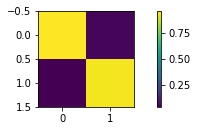

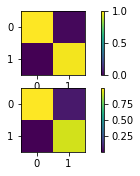

1


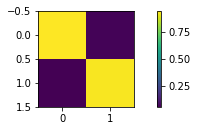

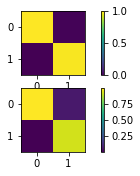

2


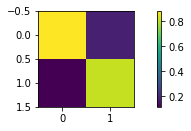

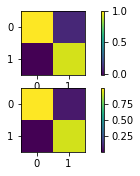

3


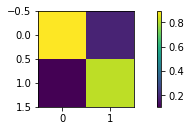

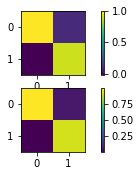

4


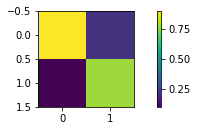

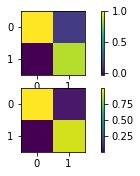

5


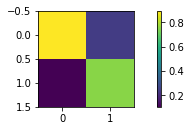

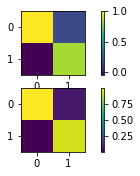

In [ ]:
for i in range (0,num_trots):
  print(i)
  plt.figure(figsize=(8,6))
  plt.subplot(311)
  plt.imshow(C_GEM[i])
  plt.colorbar()
  plt.show()
  plt.subplot(312)
  plt.imshow(C_GEM_plus[i])
  plt.colorbar()
  plt.subplot(313)
  plt.imshow(C_qiskit[i])
  plt.colorbar()
  plt.show()

In [ ]:
print(P_t)
print(G)

[0.07302837898668171, 0.12054649219139865, 0.2478544778002221, 0.2329272575413967, 0.22487702734212323, 0.24752907625023302]
[{'0': 371.60146370222384, '1': 358.6823261645933}, {'0': 607.7012626827013, '1': 597.7636592312853}, {'0': 1323.0591823958064, '1': 1155.4855956064148}, {'0': 1254.7359933980433, '1': 1074.5365820159238}, {'0': 1255.4016341397944, '1': 993.3686392814378}, {'0': 1411.197095891632, '1': 1064.093666610698}]


In [ ]:
num_times=100
times_id=time*np.arange(1,num_times+1,1,dtype=float)/(num_times+1)
print(times_id)
id_circ=[]
P_id=[]
shots_ideal=100000
for k in range (0,num_times):
  qr=QuantumRegister(7)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr,cr)
  qc.append(N_circ_OBC(100,times_id[k]),qr)
  qc.measure(qr[0],cr)
  id_circ.append(qc)
job_ideal=execute(id_circ,backend_sim_ideal,shots=shots_ideal)
job_res_id=job_ideal.result()
counts_id=job_res_id.get_counts()
for j in range (0,num_times):
  a=counts_id[j]
  for output in ['0']:
    if output in a:
        P_id.append(a[output]/shots_ideal)
    else:
        P_id.append(0)  
print(P_id)
 

[ 0.12441951  0.24883902  0.37325853  0.49767804  0.62209756  0.74651707
  0.87093658  0.99535609  1.1197756   1.24419511  1.36861462  1.49303413
  1.61745364  1.74187315  1.86629267  1.99071218  2.11513169  2.2395512
  2.36397071  2.48839022  2.61280973  2.73722924  2.86164875  2.98606826
  3.11048778  3.23490729  3.3593268   3.48374631  3.60816582  3.73258533
  3.85700484  3.98142435  4.10584386  4.23026338  4.35468289  4.4791024
  4.60352191  4.72794142  4.85236093  4.97678044  5.10119995  5.22561946
  5.35003897  5.47445849  5.598878    5.72329751  5.84771702  5.97213653
  6.09655604  6.22097555  6.34539506  6.46981457  6.59423408  6.7186536
  6.84307311  6.96749262  7.09191213  7.21633164  7.34075115  7.46517066
  7.58959017  7.71400968  7.8384292   7.96284871  8.08726822  8.21168773
  8.33610724  8.46052675  8.58494626  8.70936577  8.83378528  8.95820479
  9.08262431  9.20704382  9.33146333  9.45588284  9.58030235  9.70472186
  9.82914137  9.95356088 10.07798039 10.2023999  10.32

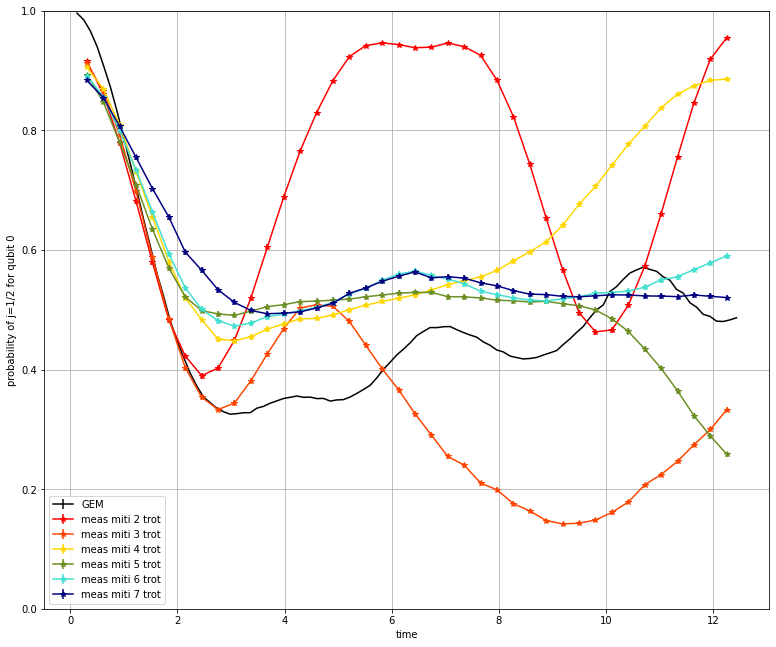

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['meas miti 2 trot','meas miti 3 trot','meas miti 4 trot','meas miti 5 trot','meas miti 6 trot','meas miti 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_raw[i], d_RAW[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

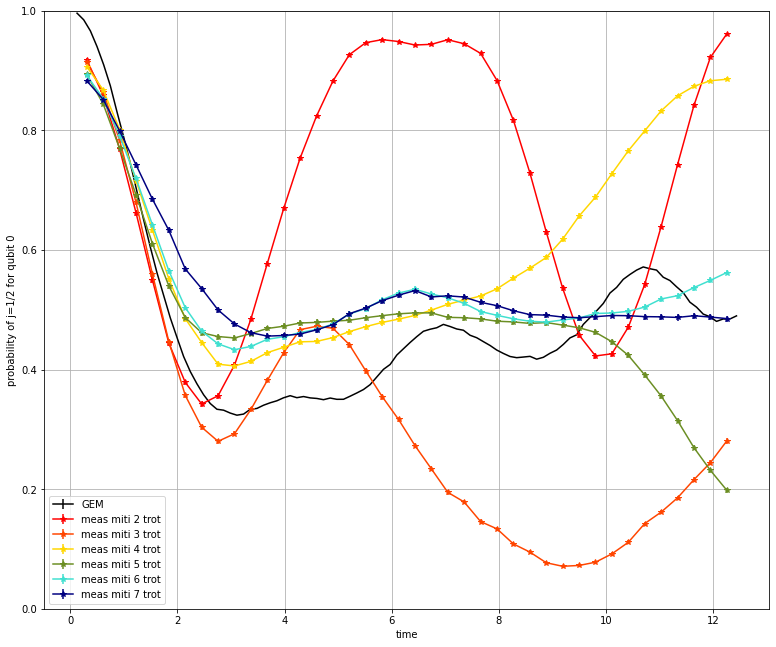

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['meas miti 2 trot','meas miti 3 trot','meas miti 4 trot','meas miti 5 trot','meas miti 6 trot','meas miti 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_meas[i], d_MEAS[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

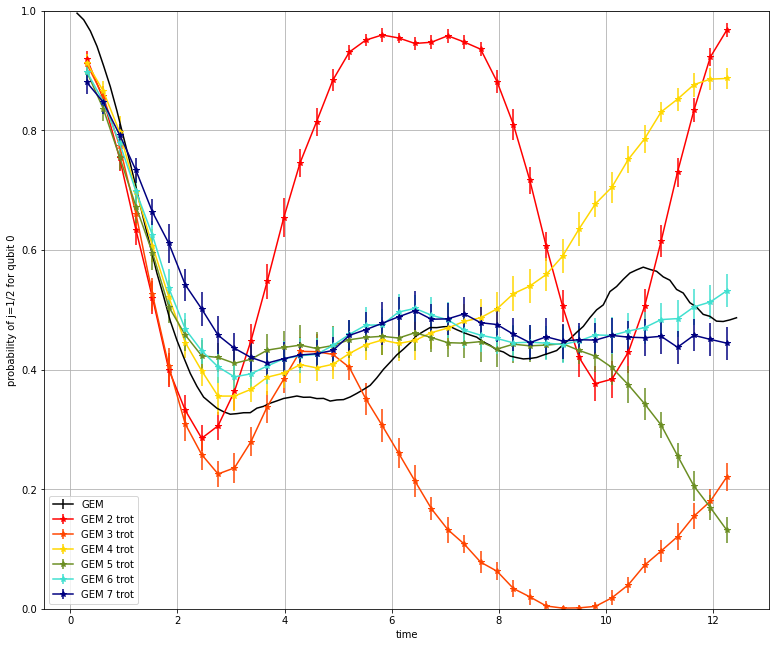

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['GEM 2 trot','GEM 3 trot','GEM 4 trot','GEM 5 trot','GEM 6 trot','GEM 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_GEM[i], d_GEM[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

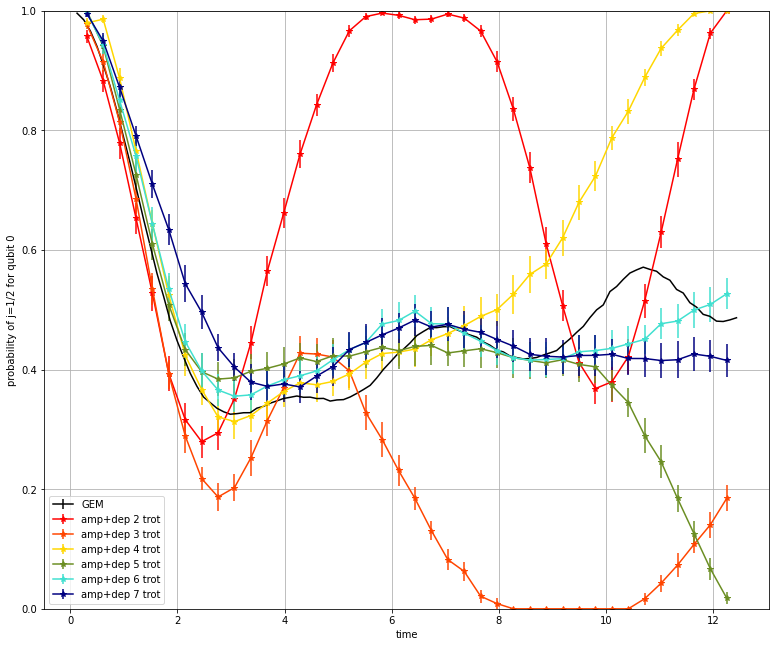

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,P_id, db, linestyle='-', marker='', color='black',label='GEM')
for i in range (0,num_trots):
  plt.errorbar(times,Probs_GEM_P[i], d_AMP[i], linestyle='-', marker='*', color=colors[i],label=labels[i])


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

In [ ]:
ideal_trots=[]
shots_ideal=100000
for j in range (0,num_trots):
  P_id=[]
  id_circ=[]
  for k in range (0,num_times):
    qr=QuantumRegister(7)
    cr=ClassicalRegister(1)
    qc=QuantumCircuit(qr,cr)
    qc.append(N_circ_OBC(j+2,times_id[k]),qr)
    qc.measure(qr[0],cr)
    id_circ.append(qc)
  job_ideal=execute(id_circ,backend_sim_ideal,shots=shots_ideal)
  job_res_id=job_ideal.result()
  counts_id=job_res_id.get_counts()

  for i in range (0,num_times):
    a=counts_id[i]
    for output in ['0']:
      if output in a:
          P_id.append(a[output]/shots_ideal)
      else:
          P_id.append(0)  
  ideal_trots.append(P_id)
print(P_id)

[0.99613, 0.98455, 0.96627, 0.9394, 0.91112, 0.87254, 0.82995, 0.78614, 0.74303, 0.69558, 0.6518, 0.60471, 0.5641, 0.52143, 0.48631, 0.44999, 0.42443, 0.39682, 0.37447, 0.35885, 0.3458, 0.33867, 0.3307, 0.33072, 0.32817, 0.33209, 0.33675, 0.34169, 0.34775, 0.35353, 0.35616, 0.36622, 0.36604, 0.36912, 0.36913, 0.37152, 0.36925, 0.36404, 0.35886, 0.35972, 0.35713, 0.3587, 0.36204, 0.36468, 0.37015, 0.37984, 0.39259, 0.40617, 0.41914, 0.43254, 0.45013, 0.46421, 0.47867, 0.48739, 0.49429, 0.5011, 0.50449, 0.49637, 0.48906, 0.47616, 0.46342, 0.44266, 0.4278, 0.4056, 0.39561, 0.37595, 0.36293, 0.35372, 0.3437, 0.33544, 0.33091, 0.32979, 0.32625, 0.3249, 0.32954, 0.32906, 0.33539, 0.3411, 0.35123, 0.36261, 0.37248, 0.38893, 0.40181, 0.42323, 0.43884, 0.45549, 0.47358, 0.4943, 0.51259, 0.52732, 0.5436, 0.55757, 0.56944, 0.58147, 0.58974, 0.59366, 0.59726, 0.59325, 0.59378, 0.59186]


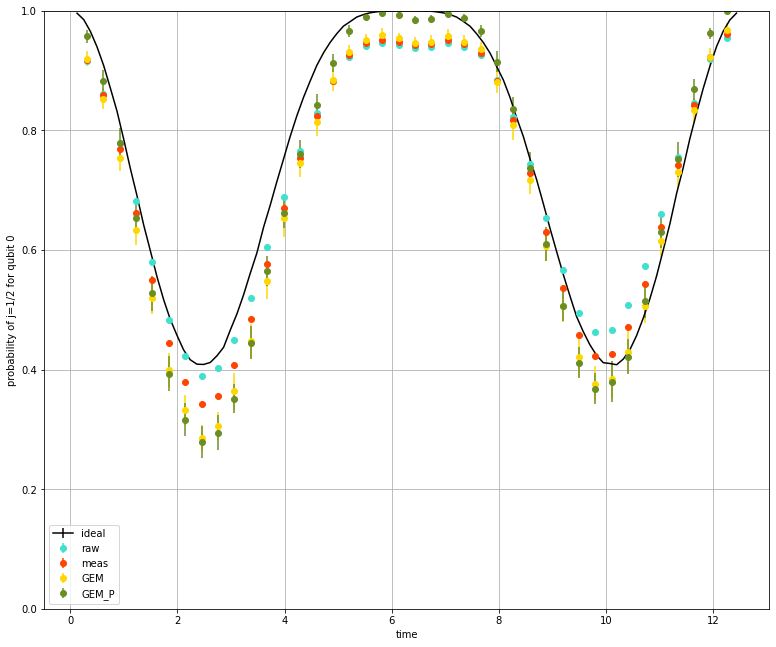

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[0], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[0], d_RAW[0], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[0], d_MEAS[0], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[0], d_GEM[0], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[0], d_AMP[0], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

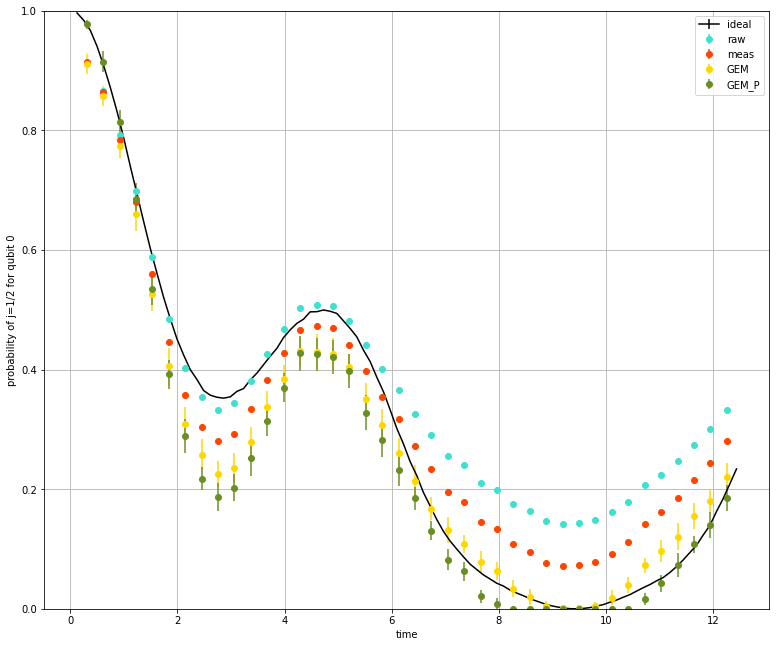

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[1], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[1], d_RAW[1], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[1], d_MEAS[1], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[1], d_GEM[1], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[1], d_AMP[1], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

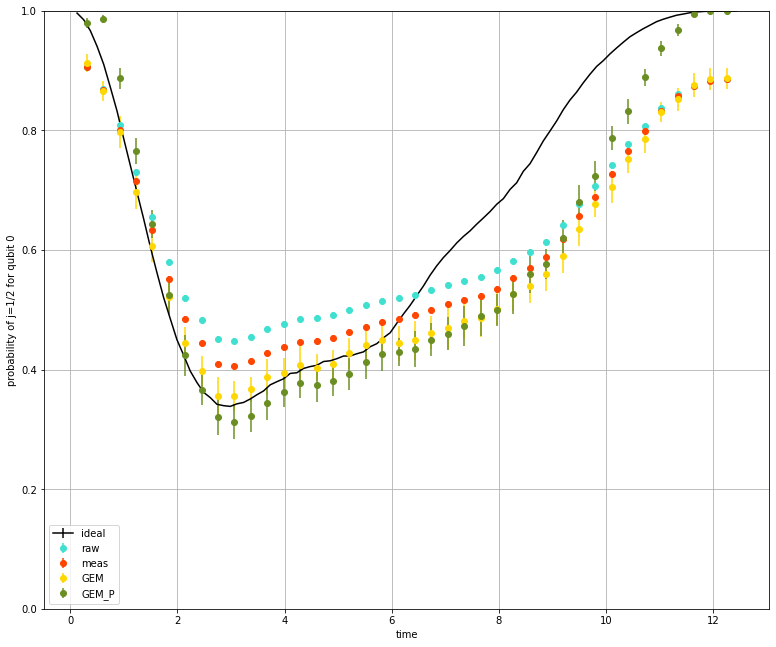

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[2], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[2], d_RAW[2], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[2], d_MEAS[2], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[2], d_GEM[2], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[2], d_AMP[2], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

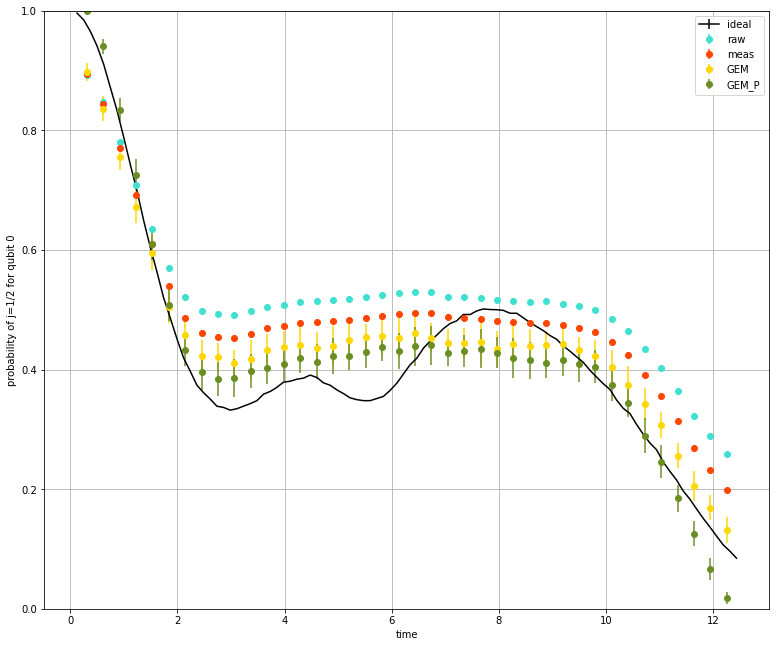

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[3], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[3], d_RAW[3], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[3], d_MEAS[3], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[3], d_GEM[3], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[3], d_AMP[3], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

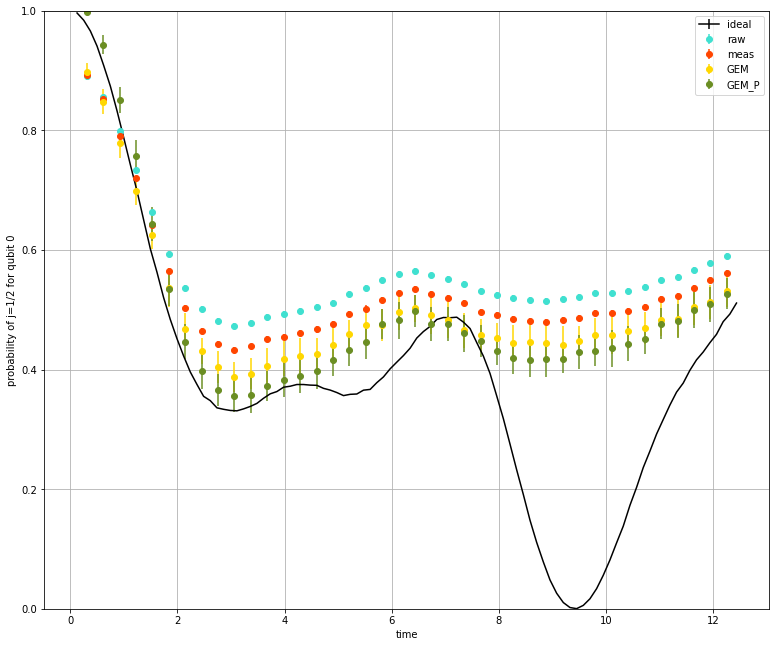

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[4], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[4], d_RAW[4], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[4], d_MEAS[4], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[4], d_GEM[4], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[4], d_AMP[4], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

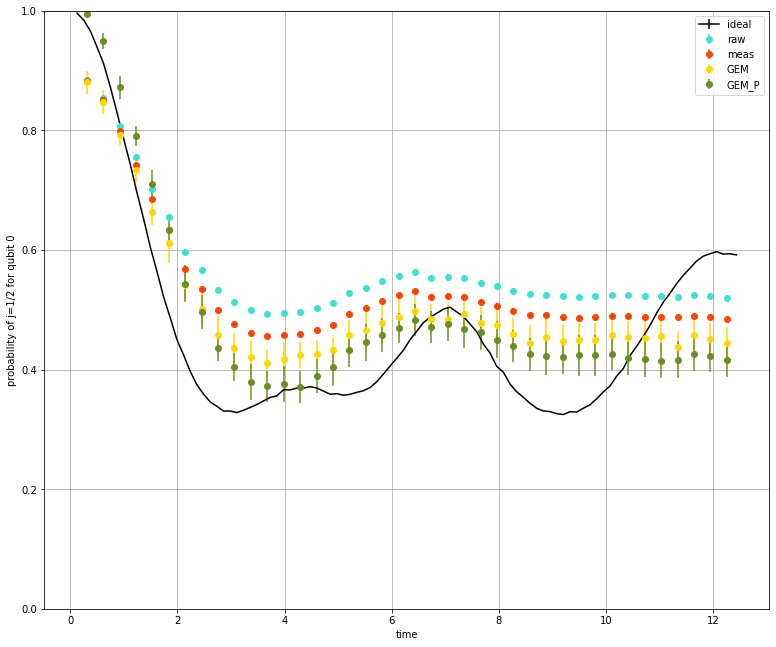

In [ ]:
db=0.000000001

colors=['red','orangered','gold','olivedrab','turquoise','navy']
labels=['amp+dep 2 trot','amp+dep 3 trot','amp+dep 4 trot','amp+dep 5 trot','amp+dep 6 trot','amp+dep 7 trot']
plt.figure(figsize=(13,11))
plt.errorbar(times_id,ideal_trots[5], db, linestyle='-', marker='', color='black',label='ideal')
plt.errorbar(times,Probs_raw[5], d_RAW[5], linestyle='', marker='o', color=colors[4],label='raw')
plt.errorbar(times,Probs_meas[5], d_MEAS[5], linestyle='', marker='o', color=colors[1],label='meas')
plt.errorbar(times,Probs_GEM[5], d_GEM[5], linestyle='', marker='o', color=colors[2],label='GEM')
plt.errorbar(times,Probs_GEM_P[5], d_AMP[5], linestyle='', marker='o', color=colors[3],label='GEM_P')


plt.xlabel('time')
plt.ylabel(r'probability of j=1/2 for qubit 0')
plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()